In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris 
iris = load_iris()

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width = '300'>

In [4]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['species'] = iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

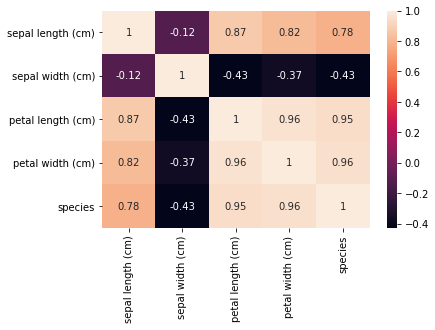

In [9]:
sns.heatmap(df.corr(), annot = True)

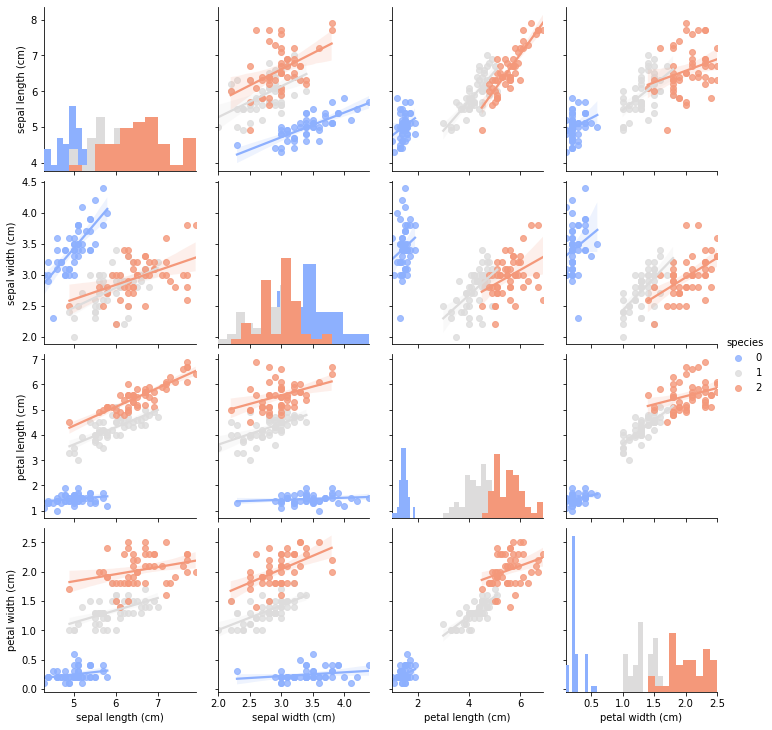

In [10]:
sns.pairplot(df,hue = "species",palette = "coolwarm",diag_kind = "hist",kind = "reg")

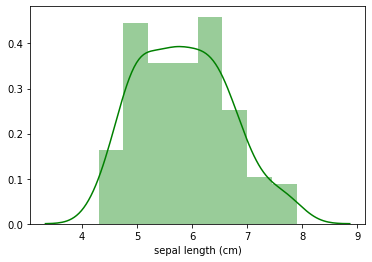

In [11]:
sns.distplot(df["sepal length (cm)"],color = "green")

# PREDICT THE SEPAL LENGTH

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df2 = df.drop("sepal length (cm)", axis = 1)
df2.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [15]:
X = df2
y = df['sepal length (cm)']

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.34, random_state = 3 )

In [17]:
X_train.shape , X_test.shape

((98, 4), (52, 4))

In [18]:
y_train.shape , y_test.shape

((98,), (52,))

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
predictions = lr.predict(X_test)

In [21]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(y_test,predictions)*100,"%")
print("MSE : ",metrics.mean_squared_error(y_test,predictions)*100,"%")
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,predictions))*100,"%")
print("R2 score :",metrics.r2_score(y_test,predictions)*100,"%")

MAE :  30.572208369164045 %
MSE :  13.685923568482236 %
RMSE : 36.99449089862197 %
R2 score : 82.06064466707905 %


## TESTING

In [22]:
Y = df.iloc[35]['sepal length (cm)']
Y

5.0

In [23]:
Y_hat = predictions[35]
Y_hat

5.081724811910306

In [24]:
Error = Y_hat - Y
Error

0.08172481191030556

In [25]:
lr.intercept_

1.8812415004367953

In [26]:
lr.coef_

array([ 0.61244717,  0.80321393, -0.7395133 , -0.06957218])

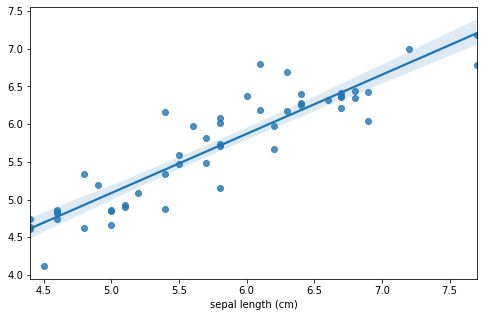

In [27]:
plt.figure(figsize = (8,5))
sns.regplot(y_test, predictions, label = "species")

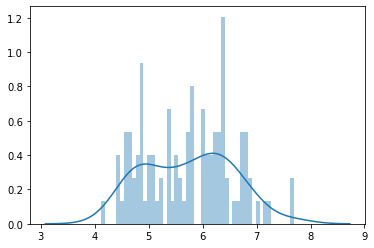

In [28]:
sns.distplot((y_test, predictions), bins = 50)